<a href="https://colab.research.google.com/github/vvvvvvss/Live-Person-Identification/blob/main/live_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!pip install mtcnn

In [50]:
import cv2 as cv
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [51]:
img = cv.imread('/content/drive/MyDrive/live_detection/girija/1.jpg')
# opencv read images as bgr and plt reads as rbg

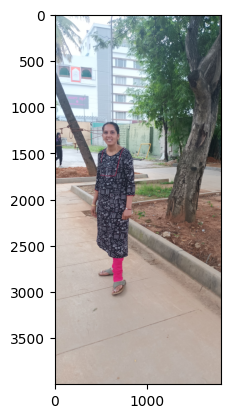

In [52]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# to convert from bgr to rbg
plt.imshow(img)

In [53]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
result = detector.detect_faces(img)

1/1 [==============================] - 0s 391ms/step


In [54]:
result

[{'box': [511, 1200, 157, 216],
  'confidence': 0.9999937415122986,
  'keypoints': {'left_eye': (549, 1284),
   'right_eye': (619, 1283),
   'nose': (579, 1322),
   'mouth_left': (555, 1357),
   'mouth_right': (619, 1358)}},
 {'box': [40, 1296, 23, 29],
  'confidence': 0.9511812329292297,
  'keypoints': {'left_eye': (50, 1308),
   'right_eye': (58, 1307),
   'nose': (57, 1313),
   'mouth_left': (52, 1320),
   'mouth_right': (59, 1319)}}]

In [55]:
x, y, w, h = result[0]['box']

In [56]:
img = cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 15)
# drawing a rectangle, such tht x,y -> 1t column and second will be x+w, y+h. (0,0,255) is the rbg notation
# 30 is the thickness

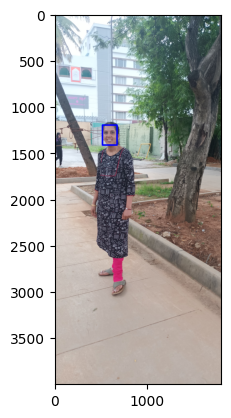

In [57]:
plt.imshow(img)

In [58]:
girija = img[y:y+h, x:x+w]
# for facenet size should be 160x160
girija = cv.resize(girija, (160, 160))

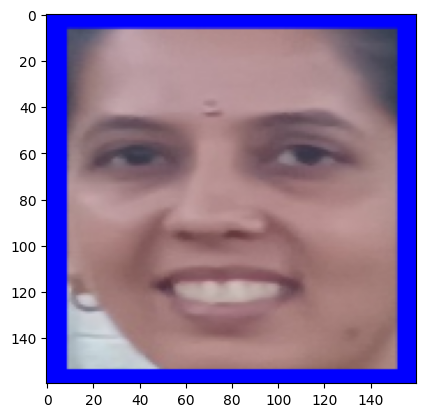

In [59]:
plt.imshow(girija)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)
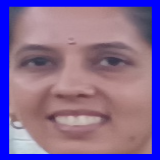

In [60]:
girija

In [61]:
class face_id:
  def __init__(self, directory):
    self.directory = directory
    self.target_size = (160, 160)
    self.X = []
    self.y = []
    self.detector = MTCNN()

  # outcome of this: x array: images. y array: labels
  def extract_face(self, filename):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    detector = MTCNN()
    x,y,w,h = detector.detect_faces(img)[0]['box']
    x, y = abs(x), abs(y)
    face = img[y:y+h, x:x+w]
    face = cv.resize(face, self.target_size)
    return face

  def load_dataset(self, dir):
    faces = []
    for im_name in os.listdir(dir):
      try:
        path = dir + '/' + im_name
        face = self.extract_face(path)
        faces.append(face)
      except Exception as e:
        pass
    return faces

  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
      path = self.directory + '/' + sub_dir+'/'
      faces = self.load_dataset(path)
      label = [sub_dir for _ in range(len(faces))]
      print(f"Loaded successfully:{len(label)}")
      self.X.extend(faces)
      self.y.extend(label)

    return np.asanyarray(self.X), np.asanyarray(self.y)

  def plot_face(self):
    plt.figure(figsize=(16, 12))
    for num, face in enumerate(self.X):
       ncols = 3
       nrows = len(self.Y)//ncols
       plt.subplot(nrows, ncols, num+1)
       plt.imshow(face)
       plt.axis('off')

In [62]:
face_id = face_id('/content/drive/MyDrive/live_detection')
X, Y = face_id.load_classes()

1/1 [==============================] - 0s 192ms/step
Loaded successfully:11
1/1 [==============================] - 0s 166ms/step
Loaded successfully:10
1/1 [==============================] - 0s 200ms/step
Loaded successfully:10


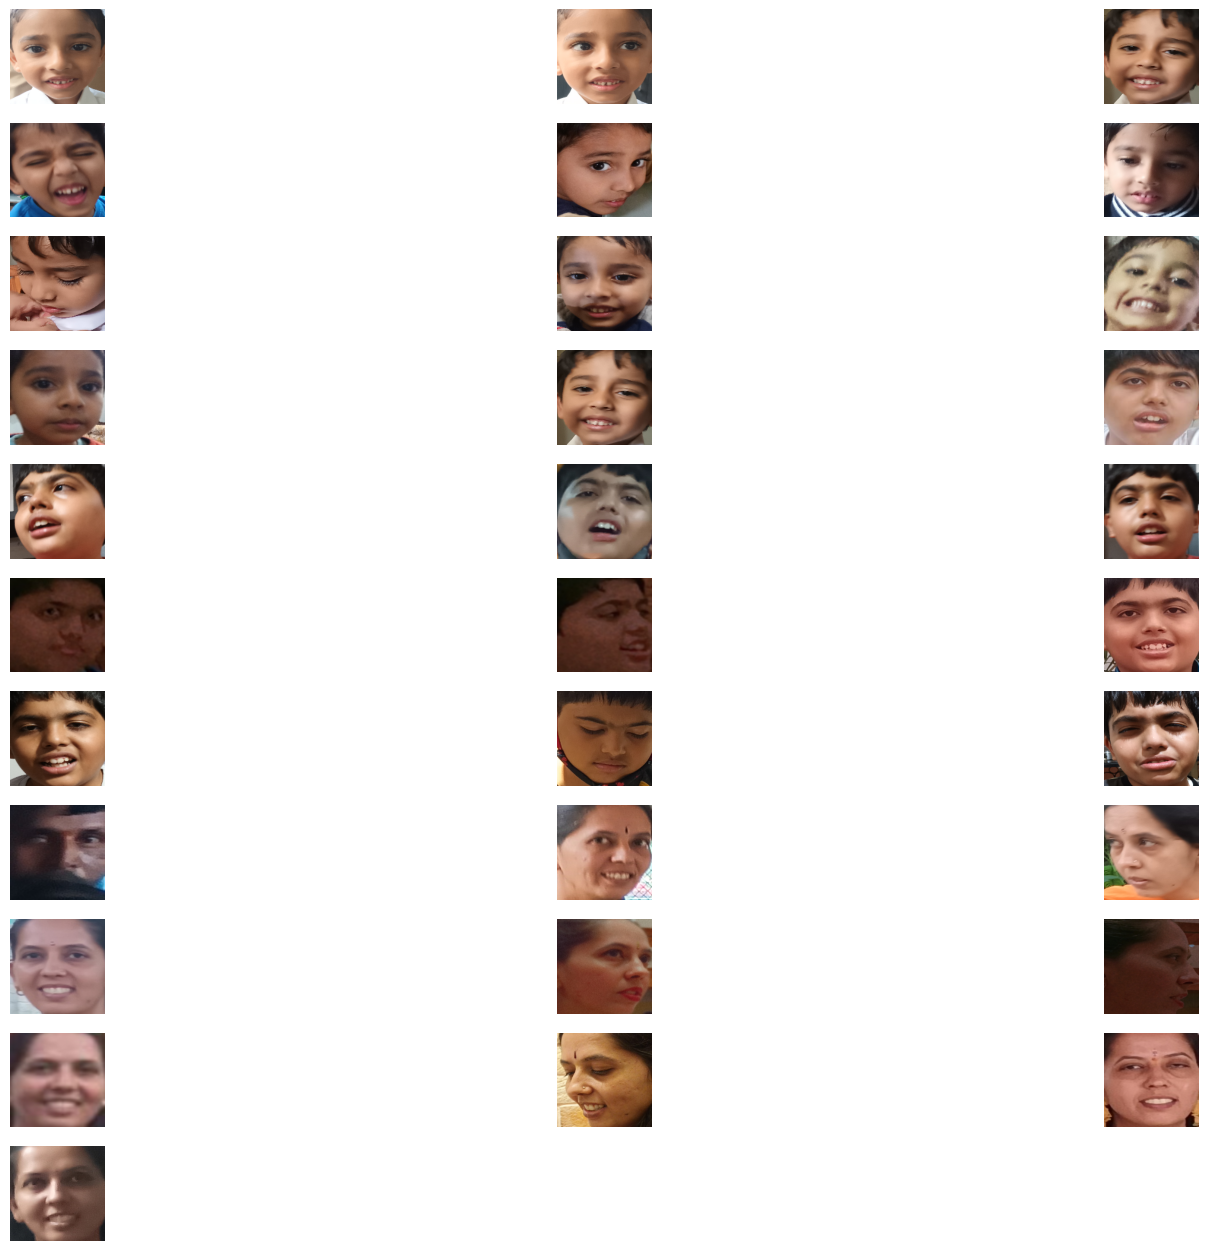

In [65]:
plt.figure(figsize=(20, 16))
for num, face in enumerate(X):
       ncols = 3
       nrows = len(Y)//ncols + 1
       plt.subplot(nrows, ncols, num+1)
       plt.imshow(face)
       plt.axis('off')

# ***FACENET***

In [66]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10369 sha256=bfc5e5f25681fe6d7f3cbe454a4bf1dcf55b8f22aee526b4cc11e3d49a5e4ff4
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [68]:
from keras_facenet import FaceNet
embedder = FaceNet()

def embedding(face):
  face = face.astype('float32')
  face = np.expand_dims(face, axis=0)
  yhat = embedder.embeddings(face)
  return yhat[0]# 512D image(0x0x512)

In [69]:
# for loop for embedding the images
X_embed = []
for face in X:
  X_embed.append(embedding(face))

X_embed = np.array(X_embed)

1/1 [==============================] - 0s 93ms/step


In [70]:
np.savez_compressed('live_identification.npz',X_embed,Y)

# ***SVM Model***

In [71]:
Y

array(['laala', 'laala', 'laala', 'laala', 'laala', 'laala', 'laala',
       'laala', 'laala', 'laala', 'laala', 'goutham', 'goutham',
       'goutham', 'goutham', 'goutham', 'goutham', 'goutham', 'goutham',
       'goutham', 'goutham', 'girija', 'girija', 'girija', 'girija',
       'girija', 'girija', 'girija', 'girija', 'girija', 'girija'],
      dtype='<U7')

In [72]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [73]:
Y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_embed, Y, shuffle=True, random_state=17)

In [82]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [83]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train, ypred_train))
print(accuracy_score(Y_test, ypred_test))

1.0
0.875


In [85]:
test_image = cv.imread('/content/drive/MyDrive/test_image.jpg')
test_image = cv.cvtColor(test_image, cv.COLOR_BGR2RGB)
x, y, w, h = detector.detect_faces(test_image)[0]['box']

3/3 [==============================] - 0s 67ms/step


In [86]:
test_image = test_image[y:y+h, x:x+w]
test_image = cv.resize(test_image, (160, 160))
test_image = embedding(test_image)

1/1 [==============================] - 0s 164ms/step


In [87]:
test_im = [test_image]

In [88]:
ypred = model.predict(test_im)

In [89]:
ypred

array([1])

In [90]:
encoder.inverse_transform(ypred)

array(['goutham'], dtype='<U7')

In [125]:
test_image2 = cv.imread('/content/drive/MyDrive/test_image2.jpg')
test_image2 = cv.cvtColor(test_image2, cv.COLOR_BGR2RGB)
x, y, w, h = detector.detect_faces(test_image2)[0]['box']

1/1 [==============================] - 0s 139ms/step


In [126]:
test_image2 = test_image2[y:y+h, x:x+w]
test_image2 = cv.resize(test_image2, (160, 160))
test_image2 = embedding(test_image2)

1/1 [==============================] - 0s 179ms/step


In [127]:
test_im2 = [test_image2]
ypred = model.predict(test_im2)
ypred

array([2])

In [128]:
encoder.inverse_transform(ypred)

array(['laala'], dtype='<U7')

In [129]:
test_image3 = cv.imread('/content/drive/MyDrive/test_image3.jpg')
test_image3 = cv.cvtColor(test_image3, cv.COLOR_BGR2RGB)
x, y, w, h = detector.detect_faces(test_image3)[0]['box']

1/1 [==============================] - 0s 129ms/step


In [130]:
test_image3 = test_image3[y:y+h, x:x+w]
test_image3 = cv.resize(test_image3, (160, 160))
test_image3 = embedding(test_image3)

1/1 [==============================] - 0s 262ms/step


In [131]:
test_im3 = [test_image3]
ypred = model.predict(test_im3)
ypred

array([0])

In [132]:
encoder.inverse_transform(ypred)

array(['girija'], dtype='<U7')